<a href="https://colab.research.google.com/github/krishnafitech/Complete-Python-3-Bootcamp/blob/master/Workday_Adaptive_Sana_Variance_Root_Cause.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Setup and Load Workday + Adaptive Data*

# 1- Getting the Data Right
Variance analysis starts with one thing — the data.
If the numbers aren’t aligned across systems, everything that comes later is noise.

Workday runs the actuals.
Adaptive holds the plan.
Sana brings the intelligence layer that explains what changed and why.

Before we build that layer, we need a clean foundation.
This step is about getting the three core exports ready from Adaptive Planning, which already integrates Workday Finance data.
Files we’re using

**All three are straight from Workday/ Adaptive:**

Actual_Expense_2025.csv → Actuals pulled from Workday Finance

Plan_Expense_2025.csv → Budget or forecast for 2025

Headcount_2025.csv → Workforce driver data from Adaptive Workforce Planning

Each file follows the same structure:

Account | Cost Center | Level | Jan-25 … Dec-25

# 2- Upload the files
We’ll now upload the three exports from Workday/ Adaptive — Actuals, Plan, and Headcount data.  
These are straight CSVs downloaded  
Once they’re uploaded, Colab can read them directly for the next steps.as (its not automated yet) we are just testing prototype.

In [2]:
from google.colab import files

# Upload the three files from your local machine
uploaded = files.upload()


Saving Plan_Expense_2025.csv to Plan_Expense_2025.csv
Saving Actual_Expense_2025.csv to Actual_Expense_2025.csv
Saving Headcount_2025.csv to Headcount_2025.csv


### 3 Load and preview

Now that the files are uploaded, load them and do a quick preview.  
We only check structure — columns and a few rows — before any transformation.


In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

# Read the three Adaptive exports
actual    = pd.read_csv("Actual_Expense_2025.csv")
plan      = pd.read_csv("Plan_Expense_2025.csv")
headcount = pd.read_csv("Headcount_2025.csv")

# Column lists (sanity check)
print("Actual columns:\n",    actual.columns.tolist(),    "\n")
print("Plan columns:\n",      plan.columns.tolist(),      "\n")
print("Headcount columns:\n", headcount.columns.tolist(), "\n")

# Quick peek at first 5 rows of each
print("Actual (top 5):")
display(actual.head())

print("Plan (top 5):")
display(plan.head())

print("Headcount (top 5):")
display(headcount.head())


Actual columns:
 ['Account Name', 'Account Code', 'Level Code', 'Customer Code', 'Cost Center Code', 'Jan-25', 'Feb-25', 'Mar-25', 'Apr-25', 'May-25', 'Jun-25', 'Jul-25', 'Aug-25', 'Sep-25', 'Oct-25', 'Nov-25', 'Dec-25'] 

Plan columns:
 ['Account Name', 'Account Code', 'Level Code', 'Customer Code', 'Cost Center Code', 'Jan-25', 'Feb-25', 'Mar-25', 'Apr-25', 'May-25', 'Jun-25', 'Jul-25', 'Aug-25', 'Sep-25', 'Oct-25', 'Nov-25', 'Dec-25'] 

Headcount columns:
 ['Account Name', 'Account Code', 'Level Code', 'Customer Code', 'Cost Center Code', 'Jan-25', 'Feb-25', 'Mar-25', 'Q1 2025', 'Apr-25', 'May-25', 'Jun-25', 'Q2 2025', 'Jul-25', 'Aug-25', 'Sep-25', 'Q3 2025', 'Oct-25', 'Nov-25', 'Dec-25', 'Q4 2025', 'FY 2025'] 

Actual (top 5):


,Account Name,Account Code,Level Code,Customer Code,Cost Center Code,Jan-25,Feb-25,Mar-25,Apr-25,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Oct-25,Nov-25,Dec-25
0,6100 Payroll,6100_Payroll,Operations (Rollup),Customer,Cost Center,"1,217,860.18","1,287,122.45","1,268,304.97","1,226,102.77","1,278,272.70","1,267,295.02","1,268,008.37","1,140,054.07","1,345,842.57","1,585,218.68","1,241,258.67","1,138,534.58"
1,6120 Commission,6120_Commission,Operations (Rollup),Customer,Cost Center,"266,352.24","250,463.82","273,887.63","293,729.98","280,591.06","274,247.37","229,992.38","180,961.84","409,072.55","274,135.26","169,246.07","264,484.32"
2,6110 Salary & Wages,6110_Salary_Wages,Operations (Rollup),Customer,Cost Center,"888,653.21","978,045.31","929,297.67","870,552.23","935,325.56","934,797.53","977,000.15","891,878.41","867,716.23","1,255,545.53","1,009,673.55","809,901.98"
3,6130 Bonus,6130_Bonus,Operations (Rollup),Customer,Cost Center,"62,854.73","58,613.32","65,119.67","61,820.57","62,356.07","58,250.12","61,015.84","67,213.82","69,053.79","55,537.89","62,339.05","64,148.28"
4,6200 Taxes & Benefits,6200_Taxes_Benefits,Operations (Rollup),Customer,Cost Center,"209,867.48","286,862.57","196,007.93","199,546.45","208,341.64","197,394.50","209,087.49","183,517.82","170,256.28","199,656.60","191,260.04","194,799.67"


Plan (top 5):


,Account Name,Account Code,Level Code,Customer Code,Cost Center Code,Jan-25,Feb-25,Mar-25,Apr-25,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Oct-25,Nov-25,Dec-25
0,6100 Payroll,6100_Payroll,Operations (Rollup),Customer,Cost Center,"1,180,048.75","1,230,787.54","1,285,751.20","1,447,141.40","1,516,140.56","1,544,407.52","1,542,773.52","1,541,139.52","1,516,922.47","1,475,694.90","1,475,694.90","1,474,060.90"
1,6110 Salary & Wages,6110_Salary_Wages,Operations (Rollup),Customer,Cost Center,"896,258.71","929,276.14","978,798.40","1,127,344.27","1,176,674.91","1,177,456.82","1,175,822.82","1,174,188.82","1,177,456.82","1,177,456.82","1,177,456.82","1,175,822.82"
2,6120 Commission,6120_Commission,Operations (Rollup),Customer,Cost Center,"243,653.64","261,375.00","263,590.17","262,053.22","281,721.74","309,206.79","309,206.79","309,206.79","281,721.74","240,494.17","240,494.17","240,494.17"
3,6130 Bonus,6130_Bonus,Operations (Rollup),Customer,Cost Center,"40,136.40","40,136.40","43,362.63","57,743.91","57,743.91","57,743.91","57,743.91","57,743.91","57,743.91","57,743.91","57,743.91","57,743.91"
4,6200 Taxes & Benefits,6200_Taxes_Benefits,Operations (Rollup),Customer,Cost Center,"253,593.92","199,080.93","572,463.94","308,834.50","244,122.89","242,178.42","239,612.54","237,220.30","236,586.37","235,576.17","232,853.88","230,226.51"


Headcount (top 5):


,Account Name,Account Code,Level Code,Customer Code,Cost Center Code,Jan-25,Feb-25,Mar-25,Q1 2025,Apr-25,May-25,Jun-25,Q2 2025,Jul-25,Aug-25,Sep-25,Q3 2025,Oct-25,Nov-25,Dec-25,Q4 2025,FY 2025
0,New Hire,Personnel.isStartMonth,Operations (Rollup),Customer,Cost Center,7.00,0.00,23.00,30.00,7.00,0.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,37.00
1,Headcount,Personnel.Headcount,Operations (Rollup),Customer,Cost Center,112.00,112.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00
2,FTE,Personnel.FTE,Operations (Rollup),Customer,Cost Center,105.23,112.00,117.06,117.06,128.23,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00
3,Salary,Personnel.Salary,United States (Rollup),Customer,Cost Center,"139,731.18","144,166.67","150,119.62","434,017.47","168,376.39","173,954.12","173,954.12","516,284.64","173,954.12","173,954.12","173,954.12","521,862.37","173,954.12","173,954.12","173,954.12","521,862.37","1,994,026.86"
4,Hours,Personnel.Hours,United States (Rollup),Customer,Cost Center,681.29,720.00,745.81,745.81,801.33,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00


### 4 Prepare Plan vs Actual Variance

Now that all three files are loaded, we’ll combine Plan and Actual data.

Workday holds the actuals.  
Adaptive Planning holds the plan.  
Our goal is to align both by account, cost center, and period to see the variance.

We’ll reshape both datasets from wide to long format, standardize month names (Jan-25 → 2025-01),  
and calculate simple variance (Actual – Plan) and % variance.

This gives a single, clean view that any AI model or dashboard can use for diagnostic or predictive analysis.

In [ ]:
# --- Step 4: Prepare Plan vs Actual Variance and Merge Headcount ---

import pandas as pd
import numpy as np
import re
from dateutil.parser import parse

# Load Adaptive Planning exports
actual = pd.read_csv("Actual_Expense_2025.csv")
plan   = pd.read_csv("Plan_Expense_2025.csv")

# Detect month columns (e.g., Jan-25 … Dec-25)
def is_month(col):
    return bool(re.search(r"[A-Za-z]{3}-\d{2,4}", str(col)))

month_cols = [c for c in actual.columns if is_month(c)]
id_cols    = [c for c in actual.columns if c not in month_cols]

# Normalize period to YYYY-MM
def norm_period(s):
    dt = parse(str(s))
    return f"{dt.year:04d}-{dt.month:02d}"

# Unpivot to long format
actual_long = actual.melt(id_vars=id_cols, value_vars=month_cols,
                          var_name="Period_raw", value_name="Actual")
plan_long   = plan.melt(id_vars=id_cols, value_vars=month_cols,
                        var_name="Period_raw", value_name="Plan")

# Normalize Period
actual_long["Period"] = actual_long["Period_raw"].map(norm_period)
plan_long["Period"]   = plan_long["Period_raw"].map(norm_period)

# Merge Plan and Actual
keys = [c for c in id_cols if c.lower() in {"account","level","cost center","cost_center"}] + ["Period"]
merged = pd.merge(plan_long.drop(columns=["Period_raw"]),
                  actual_long.drop(columns=["Period_raw"]),
                  on=keys, how="outer")

# Calculate variance
merged["Variance"]     = merged["Actual"] - merged["Plan"]
merged["Variance_pct"] = np.where(merged["Plan"].fillna(0) != 0,
                                  merged["Variance"]/merged["Plan"], np.nan)

print("Variance dataset ready:", merged.shape)
display(merged.head(10))

# --- Add Headcount Merge so final dataset is ready ---

# Load Headcount file
headcount = pd.read_csv("Headcount_2025.csv")
print("Headcount loaded:", headcount.shape)

# Keep only 'Headcount' metric rows
hc = headcount[headcount['Account Name'].str.contains('Headcount', case=False, na=False)]

# Detect month columns
month_cols_hc = [c for c in hc.columns if '-' in c]
id_cols_hc = [c for c in hc.columns if c not in month_cols_hc]

# Unpivot to long format
hc_long = hc.melt(
    id_vars=id_cols_hc,
    value_vars=month_cols_hc,
    var_name='Period_raw',
    value_name='Headcount'
)

# Normalize period
def norm_period(s):
    try:
        dt = parse(str(s))
        return f"{dt.year:04d}-{dt.month:02d}"
    except:
        return s

hc_long['Period'] = hc_long['Period_raw'].map(norm_period)

# Keep only relevant columns
hc_join = hc_long[['Level Code', 'Period', 'Headcount']]

# Merge with variance data
final = pd.merge(
    merged,
    hc_join,
    left_on=['Level Code_x', 'Period'],
    right_on=['Level Code', 'Period'],
    how='left'
)

print("Final dataset ready:", final.shape)
display(final.head(10))


Variance dataset ready: (38109552, 15)


,Account Name_x,Account Code_x,Level Code_x,Customer Code_x,Cost Center Code_x,Plan,Period,Account Name_y,Account Code_y,Level Code_y,Customer Code_y,Cost Center Code_y,Actual,Variance,Variance_pct
0,6100 Payroll,6100_Payroll,Operations (Rollup),Customer,Cost Center,1.180049e+06,2025-01,6100 Payroll,6100_Payroll,Operations (Rollup),Customer,Cost Center,1.217860e+06,3.781142e+04,0.032042
1,6100 Payroll,6100_Payroll,Operations (Rollup),Customer,Cost Center,1.180049e+06,2025-01,6120 Commission,6120_Commission,Operations (Rollup),Customer,Cost Center,2.663522e+05,-9.136965e+05,-0.774287
2,6100 Payroll,6100_Payroll,Operations (Rollup),Customer,Cost Center,1.180049e+06,2025-01,6110 Salary & Wages,6110_Salary_Wages,Operations (Rollup),Customer,Cost Center,8.886532e+05,-2.913955e+05,-0.246935
3,6100 Payroll,6100_Payroll,Operations (Rollup),Customer,Cost Center,1.180049e+06,2025-01,6130 Bonus,6130_Bonus,Operations (Rollup),Customer,Cost Center,6.285473e+04,-1.117194e+06,-0.946735
4,6100 Payroll,6100_Payroll,Operations (Rollup),Customer,Cost Center,1.180049e+06,2025-01,6200 Taxes & Benefits,6200_Taxes_Benefits,Operations (Rollup),Customer,Cost Center,2.098675e+05,-9.701813e+05,-0.822154
5,6100 Payroll,6100_Payroll,Operations (Rollup),Customer,Cost Center,1.180049e+06,2025-01,6210 Health Benefits,6210_Health_Benefits,Operations (Rollup),Customer,Cost Center,3.506264e+04,-1.144986e+06,-0.970287
6,6100 Payroll,6100_Payroll,Operations (Rollup),Customer,Cost Center,1.180049e+06,2025-01,6220 Retirement,6220_Retirement,Operations (Rollup),Customer,Cost Center,5.351067e+04,-1.126538e+06,-0.954654
7,6100 Payroll,6100_Payroll,Operations (Rollup),Customer,Cost Center,1.180049e+06,2025-01,6230 Payroll Taxes,6230_Payroll_Taxes,Operations (Rollup),Customer,Cost Center,1.212942e+05,-1.058755e+06,-0.897213
8,6100 Payroll,6100_Payroll,Operations (Rollup),Customer,Cost Center,1.180049e+06,2025-01,6240 Recruiting,6240_Recruiting,Operations (Rollup),Customer,Cost Center,0.000000e+00,-1.180049e+06,-1.000000
9,6100 Payroll,6100_Payroll,Operations (Rollup),Customer,Cost Center,1.180049e+06,2025-01,6000 Operating Expenses,6000_Operating_Expenses,Operations (Rollup),Customer,Cost Center,1.622671e+06,4.426225e+05,0.375088


Headcount loaded: (361, 22)


### 5 Add Headcount Driver

Headcount is our first operational driver.  
Workday tracks the actuals, Adaptive holds the plan, and this workforce data connects both.  

We reshape the Headcount data so each month becomes a row, then join it with our variance table using `Level Code` and `Period`.  
This step builds the link between cost movement and people movement — a foundation for diagnostic analysis and explainable FP&A models.


In [ ]:
# --- Step 5: Add Headcount Driver ---

import pandas as pd
import numpy as np
import re
from dateutil.parser import parse

# --- 1. Reload data and rebuild variance if missing ---
if 'merged' not in locals():
    print("Rebuilding Plan vs Actual variance dataset...")

    actual = pd.read_csv("Actual_Expense_2025.csv")
    plan   = pd.read_csv("Plan_Expense_2025.csv")

    def is_month(col):
        return bool(re.search(r"[A-Za-z]{3}-\d{2,4}", str(col)))

    month_cols = [c for c in actual.columns if is_month(c)]
    id_cols = [c for c in actual.columns if c not in month_cols]

    def norm_period(s):
        dt = parse(str(s))
        return f"{dt.year:04d}-{dt.month:02d}"

    actual_long = actual.melt(id_vars=id_cols, value_vars=month_cols,
                              var_name="Period_raw", value_name="Actual")
    plan_long   = plan.melt(id_vars=id_cols, value_vars=month_cols,
                            var_name="Period_raw", value_name="Plan")

    actual_long["Period"] = actual_long["Period_raw"].map(norm_period)
    plan_long["Period"]   = plan_long["Period_raw"].map(norm_period)

    keys = [c for c in id_cols if c.lower() in {"account","level","cost center","cost_center"}] + ["Period"]
    merged = pd.merge(plan_long.drop(columns=["Period_raw"]),
                      actual_long.drop(columns=["Period_raw"]),
                      on=keys, how="outer")

    merged["Variance"] = merged["Actual"] - merged["Plan"]
    merged["Variance_pct"] = np.where(merged["Plan"].fillna(0)!=0,
                                      merged["Variance"]/merged["Plan"], np.nan)

    print("Variance dataset rebuilt:", merged.shape)

# --- 2. Load and merge Headcount data ---
headcount = pd.read_csv("Headcount_2025.csv")
print("Headcount loaded:", headcount.shape)

hc = headcount[headcount['Account Name'].str.contains('Headcount', case=False, na=False)]

month_cols_hc = [c for c in hc.columns if '-' in c]
id_cols_hc = [c for c in hc.columns if c not in month_cols_hc]

hc_long = hc.melt(id_vars=id_cols_hc,
                  value_vars=month_cols_hc,
                  var_name='Period_raw',
                  value_name='Headcount')

def norm_period(s):
    try:
        dt = parse(str(s))
        return f"{dt.year:04d}-{dt.month:02d}"
    except:
        return s

hc_long['Period'] = hc_long['Period_raw'].map(norm_period)

# --- 3. Merge variance + headcount ---
final = pd.merge(
    merged,
    hc_long[['Level Code', 'Period', 'Headcount']],
    left_on=['Level Code_x', 'Period'],
    right_on=['Level Code', 'Period'],
    how='left'
)

print("Final dataset ready:", final.shape)
display(final.head(10))


Rebuilding Plan vs Actual variance dataset...
Variance dataset rebuilt: (38109552, 15)
Headcount loaded: (361, 22)


### 6 Build a simple regression (diagnostic)

Now we move from “what changed” to “why it changed”.

Target = `Variance`  
Drivers = `Headcount`, `Plan`  

We train a lightweight linear model on a small random sample (to avoid memory issues).  
Output shows coefficients, basic fit metrics, and a quick predicted vs actual check.


In [3]:
print(headcount.columns.tolist())


['Account Name', 'Account Code', 'Level Code', 'Customer Code', 'Cost Center Code', 'Jan-25', 'Feb-25', 'Mar-25', 'Q1 2025', 'Apr-25', 'May-25', 'Jun-25', 'Q2 2025', 'Jul-25', 'Aug-25', 'Sep-25', 'Q3 2025', 'Oct-25', 'Nov-25', 'Dec-25', 'Q4 2025', 'FY 2025']


In [1]:
# --- Step 6: Regression modeling (memory-safe, self-contained) ---

import pandas as pd
import numpy as np
import re
from dateutil.parser import parse
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# ---------- helpers ----------
def is_month(col):
    return bool(re.search(r"[A-Za-z]{3}-\d{2,4}", str(col)))

def norm_period(s):
    dt = parse(str(s))
    return f"{dt.year:04d}-{dt.month:02d}"

def rebuild_final():
    """Rebuild Plan vs Actual variance and join Headcount. Returns `final` DataFrame."""
    # Load sources
    actual = pd.read_csv("Actual_Expense_2025.csv")
    plan   = pd.read_csv("Plan_Expense_2025.csv")
    headcount = pd.read_csv("Headcount_2025.csv")

    # Identify month and id columns
    month_cols = [c for c in actual.columns if is_month(c)]
    id_cols_all = [c for c in actual.columns if c not in month_cols]

    # Keep key identifiers explicitly if present (stable join + smaller memory)
    preferred_ids = [c for c in ['Account Name','Account Code','Level Code','Cost Center Code'] if c in id_cols_all]
    id_cols = preferred_ids if preferred_ids else id_cols_all

    # Unpivot plan/actual
    actual_long = actual.melt(id_vars=id_cols, value_vars=month_cols,
                              var_name="Period_raw", value_name="Actual")
    plan_long   = plan.melt(id_vars=id_cols, value_vars=month_cols,
                            var_name="Period_raw", value_name="Plan")

    actual_long["Period"] = actual_long["Period_raw"].map(norm_period)
    plan_long["Period"]   = plan_long["Period_raw"].map(norm_period)

    # Merge plan vs actual (keys = intersecting ids + Period)
    base_keys = [c for c in id_cols if c.lower() in {"account name","account code","level code","cost center code"}] + ["Period"]
    merged = pd.merge(
        plan_long.drop(columns=["Period_raw"]),
        actual_long.drop(columns=["Period_raw"]),
        on=base_keys,
        how="outer",
        suffixes=("_plan","_act")  # avoid Pandas _x/_y explosion
    )

    # If suffixes didn’t apply (identical ids), ensure we still have Plan/Actual
    # (No-op if columns already named Plan/Actual.)
    if "Plan" not in merged.columns:
        # Plan/Actual columns already named; nothing to do
        pass

    # Calculate variance
    merged["Variance"] = merged["Actual"] - merged["Plan"]
    merged["Variance_pct"] = np.where(merged["Plan"].fillna(0)!=0,
                                      merged["Variance"]/merged["Plan"], np.nan)

    # --- Headcount prep ---
    hc = headcount[headcount['Account Name'].str.contains('Headcount', case=False, na=False)]
    month_cols_hc = [c for c in hc.columns if is_month(c)]
    id_cols_hc_all = [c for c in hc.columns if c not in month_cols_hc]
    hc_id = [c for c in ['Level Code','Cost Center Code'] if c in id_cols_hc_all]
    if not hc_id:
        # fallback: use whatever id column is common with merged
        hc_id = [c for c in id_cols_hc_all if c in merged.columns]

    hc_long = hc.melt(id_vars=id_cols_hc_all, value_vars=month_cols_hc,
                      var_name='Period_raw', value_name='Headcount')
    hc_long['Period'] = hc_long['Period_raw'].map(norm_period)

    # Choose join key: prefer Level Code, else Cost Center Code
    join_key = 'Level Code' if 'Level Code' in hc_long.columns and 'Level Code' in merged.columns else \
               'Cost Center Code' if 'Cost Center Code' in hc_long.columns and 'Cost Center Code' in merged.columns else None
    if join_key is None:
        raise ValueError("No common join key between variance and headcount (expected 'Level Code' or 'Cost Center Code').")

    final = pd.merge(
        merged,
        hc_long[[join_key, 'Period', 'Headcount']],
        on=[join_key, 'Period'],
        how='left'
    )
    return final

# ---------- ensure final exists ----------
try:
    final
except NameError:
    print("Rebuilding final (variance + headcount)…")
    final = rebuild_final()
    print("Final shape:", final.shape)

# ---------- model on a small, representative sample ----------
# Keep only required numeric columns
cols_needed = [c for c in ['Plan','Actual','Variance','Variance_pct','Headcount'] if c in final.columns]
dfm = final[cols_needed].copy()

# Clean numeric
for c in cols_needed:
    dfm[c] = pd.to_numeric(dfm[c], errors='coerce')

dfm = dfm.dropna(subset=['Variance','Headcount','Plan'])
if len(dfm) == 0:
    raise ValueError("No rows available for modeling after cleaning. Check that Plan/Actual/Headcount are present and numeric.")

# Sample to avoid RAM issues
sample_n = min(10000, max(2000, int(0.01 * len(dfm))))  # up to 10k, at least 2k
dfm_sample = dfm.sample(sample_n, random_state=42) if len(dfm) > sample_n else dfm.copy()
print(f"Model sample size: {len(dfm_sample)} rows")

# Features and target
X = dfm_sample[['Headcount','Plan']]
y = dfm_sample['Variance']

# Fit model
lr = LinearRegression()
lr.fit(X, y)

# Metrics
y_pred = lr.predict(X)
r2  = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print("\nCoefficients:")
print(f"Headcount: {lr.coef_[0]:.4f}")
print(f"Plan     : {lr.coef_[1]:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")

print(f"\nR^2: {r2:.4f}  |  MAE: {mae:,.2f}")

# Attach predictions for quick inspection
out = dfm_sample.copy()
out['Predicted_Variance'] = y_pred
out['Residual'] = out['Variance'] - out['Predicted_Variance']
display(out.head(10))

# Optional: save sample results for your Sana collection or review
out.to_csv("model_results_sample.csv", index=False)
print("Saved: model_results_sample.csv")


Rebuilding final (variance + headcount)…
Final shape: (25308, 10)
Model sample size: 2000 rows

Coefficients:
Headcount: 395.3591
Plan     : -0.1929
Intercept: 1293.0656

R^2: 0.4645  |  MAE: 35,026.88


,Plan,Actual,Variance,Variance_pct,Headcount,Predicted_Variance,Residual
15219,1565.393000,2021.397098,456.004098,0.291303,158.0,63457.841236,-63001.837138
15393,100.000000,200.000000,100.000000,1.000000,6.6,3883.145777,-3783.145777
4959,96413.043478,89278.200000,-7134.843478,-0.074003,3.4,-15960.590495,8825.747017
12046,3474.000000,2605.500000,-868.500000,-0.250000,8.0,3785.810876,-4654.310876
15069,0.000000,3850.000000,3850.000000,NaN,3.0,2479.142835,1370.857165
18739,145.136286,676.730397,531.594112,3.662724,1.0,1660.428158,-1128.834046
6327,1386.785000,1196.513542,-190.271458,-0.137203,1.0,1420.916685,-1611.188143
11022,2024.698410,2652.000000,627.301590,0.309825,6.6,3511.875429,-2884.573839
18902,16802.582204,27815.626092,11013.043888,0.655438,29.0,9517.295858,1495.748030
3431,3389.343750,4950.000000,1560.656250,0.460460,4.0,2220.704519,-660.048269


Saved: model_results_sample.csv


7 Explain variance with SHAP

Now that the regression model works, we’ll measure how much each driver — Headcount or Plan — contributes to the variance at a record level.
This gives local and global explanations for Sana or finance users to visualize “why variance moved”.

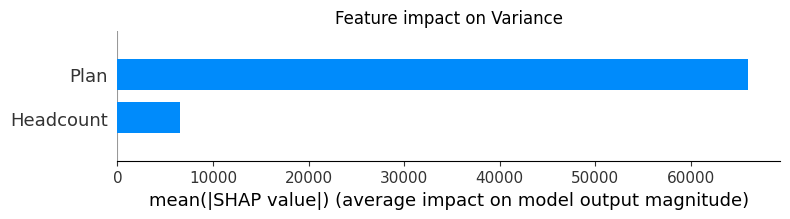

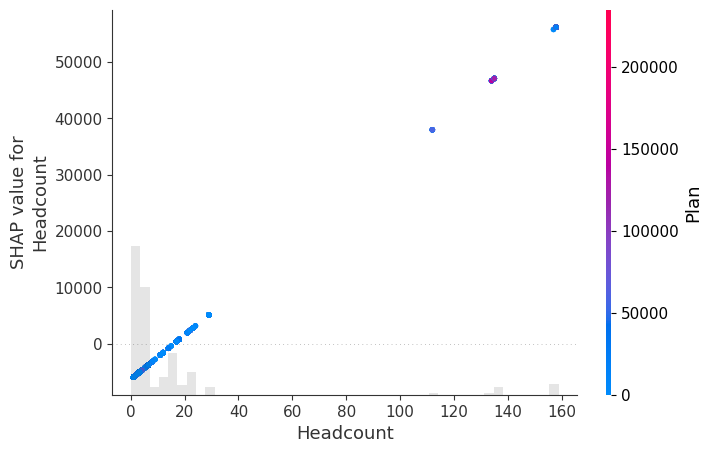

In [2]:
# --- Step 7: Explainability using SHAP ---

import shap
import matplotlib.pyplot as plt

# prepare explainer on same model and sample data
explainer = shap.Explainer(lr, X)
shap_values = explainer(X)

# summary plot (feature impact)
plt.title("Feature impact on Variance")
shap.summary_plot(shap_values, X, plot_type="bar")

# detailed scatter plot
shap.plots.scatter(shap_values[:, "Headcount"], color=shap_values[:, "Plan"])


### 8 Variance story for AI assistant / dashboard export

We’ve modeled the drivers and quantified their impact.  
Now we need a clean dataset that any AI assistant or dashboard can read and explain — *“why did variance move here?”*  

This export combines:
- the key financial facts (`Plan`, `Actual`, `Variance`)
- the driver metrics (`Headcount`)
- the AI diagnostics (`Predicted_Variance`, `Residual`, `SHAP_Headcount`, `SHAP_Plan`)

This gives a structured layer that Sa


In [3]:
# --- Step 8: Variance story export (for AI / dashboard layer) ---

import pandas as pd
import shap

# Attach SHAP values to our sample data
shap_df = pd.DataFrame(
    shap_values.values,
    columns = X.columns
)
shap_df['SHAP_sum'] = shap_df.sum(axis=1)

# Combine everything into one compact table
story = pd.concat([
    out.reset_index(drop=True),
    shap_df.reset_index(drop=True)
], axis=1)

# Select relevant columns
cols = ['Plan', 'Actual', 'Variance', 'Variance_pct', 'Headcount',
        'Predicted_Variance', 'Residual', 'SHAP_sum', 'Headcount', 'Plan']
story = story[cols]

# Rename for clarity
story = story.rename(columns={
    'Variance_pct': 'Variance_%',
    'SHAP_sum': 'AI_Explained_Impact'
})

# Sort by highest variance
story = story.sort_values('Variance', ascending=False).reset_index(drop=True)

# Save the file
story.to_csv("variance_story_for_ai.csv", index=False)
print("Saved: variance_story_for_ai.csv")

# Preview top rows
display(story.head(10))


Saved: variance_story_for_ai.csv


,Plan,Plan,Actual,Variance,Variance_%,Headcount,Headcount,Predicted_Variance,Residual,AI_Explained_Impact,Headcount,Headcount,Plan,Plan
0,1.210861e+05,28240.305134,2.758268e+06,2.637182e+06,21.779399,135.0,47051.092668,31309.292650,2.605872e+06,75291.397802,135.0,47051.092668,1.210861e+05,28240.305134
1,2.261567e+06,-384653.975921,4.665856e+06,2.404289e+06,1.063108,158.0,56144.351816,-372491.729257,2.776781e+06,-328509.624105,158.0,56144.351816,2.261567e+06,-384653.975921
2,2.431722e+06,-417476.687828,4.681003e+06,2.249280e+06,0.924974,2.0,-5531.666755,-466990.459735,2.716271e+06,-423008.354583,2.0,-5531.666755,2.431722e+06,-417476.687828
3,3.881880e+06,-697209.079173,5.709079e+06,1.827199e+06,0.470700,17.0,398.719646,-740792.464679,2.567992e+06,-696810.359527,17.0,398.719646,3.881880e+06,-697209.079173
4,2.476161e+06,-426048.843282,3.519450e+06,1.043289e+06,0.421333,4.0,-4740.948569,-474771.897003,1.518061e+06,-430789.791851,4.0,-4740.948569,2.476161e+06,-426048.843282
5,7.750944e+05,-97916.553323,1.629763e+06,8.546687e+05,1.102664,6.6,-3713.014926,-145611.673400,1.000280e+06,-101629.568248,6.6,-3713.014926,7.750944e+05,-97916.553323
6,1.788420e+06,-293384.968759,2.518014e+06,7.295943e+05,0.407955,6.6,-3713.014926,-341080.088837,1.070674e+06,-297097.983685,6.6,-3713.014926,1.788420e+06,-293384.968759
7,0.000000e+00,51597.555649,5.400000e+05,5.400000e+05,NaN,6.6,-3713.014926,3902.435571,5.360976e+05,47884.540723,6.6,-3713.014926,0.000000e+00,51597.555649
8,1.521470e+06,-241890.927311,2.037055e+06,5.155847e+05,0.338873,5.6,-4108.374019,-289981.406482,8.055661e+05,-245999.301330,5.6,-4108.374019,1.521470e+06,-241890.927311
9,1.082268e+06,-157169.706362,1.561918e+06,4.796496e+05,0.443189,17.0,398.719646,-200753.091869,6.804027e+05,-156770.986717,17.0,398.719646,1.082268e+06,-157169.706362


### 9 Visual storytelling — turning numbers into variance insight

Now that the AI model and SHAP explainability are ready,  
we’ll visualize what’s driving variance — not just the totals,  
but *how much each driver (Plan, Headcount)* explains across the portfolio.

This helps FP&A and finance teams see:
- where large budget swings are consistent with plan size  
- which levels or cost centers show variance driven by people (headcount shifts)  
- where AI explanations don’t align (residual high → other drivers)

We’ll plot a simple impact chart and residual check.


/tmp/ipython-input-2482960982.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=story[['Plan','Headcount','AI_Explained_Impact']],


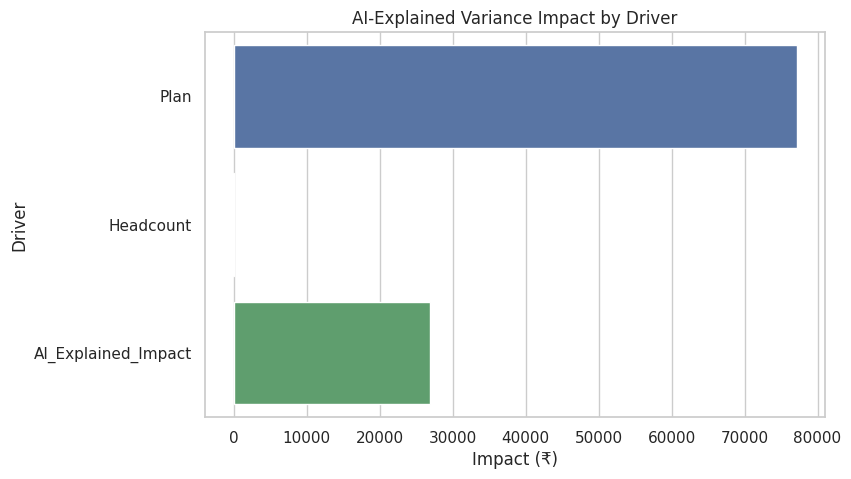

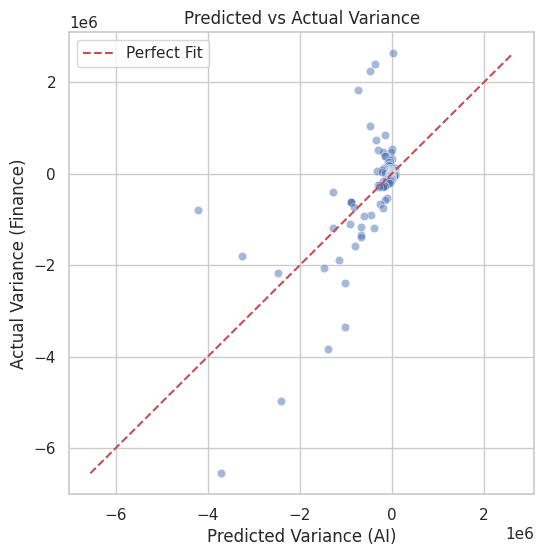

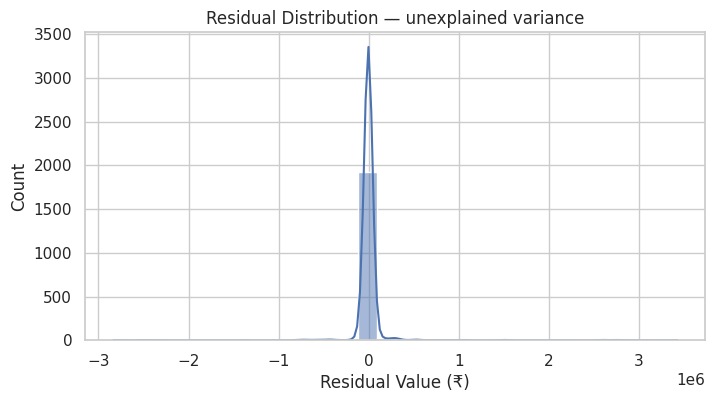

In [4]:
# --- Step 9: Variance storytelling visuals ---

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# 1. Plot overall driver contribution (Plan vs Headcount)
plt.figure(figsize=(8,5))
sns.barplot(data=story[['Plan','Headcount','AI_Explained_Impact']],
            orient='h', ci=None)
plt.title("AI-Explained Variance Impact by Driver")
plt.xlabel("Impact (₹)")
plt.ylabel("Driver")
plt.show()

# 2. Scatter Predicted vs Actual Variance
plt.figure(figsize=(6,6))
sns.scatterplot(x=story['Predicted_Variance'],
                y=story['Variance'],
                alpha=0.5)
plt.plot([story['Variance'].min(), story['Variance'].max()],
         [story['Variance'].min(), story['Variance'].max()],
         'r--', label='Perfect Fit')
plt.legend()
plt.title("Predicted vs Actual Variance")
plt.xlabel("Predicted Variance (AI)")
plt.ylabel("Actual Variance (Finance)")
plt.show()

# 3. Residual Distribution (how much variance remains unexplained)
plt.figure(figsize=(8,4))
sns.histplot(story['Residual'], bins=30, kde=True)
plt.title("Residual Distribution — unexplained variance")
plt.xlabel("Residual Value (₹)")
plt.show()


### 10 Variance narrative — turning model output into finance story

Up to now, we’ve built the technical layers:
- Plan vs Actual variance (data alignment)
- Driver modeling (Plan + Headcount)
- AI explainability (SHAP + regression)
- Visual storytelling (diagnostic view)

Now we generate a **variance narrative file** — structured sentences that Sana or LedgerMind AI can read to produce contextual insights.  
Each line explains what drove the variance for a Level, Cost Center, or Month.

This isn’t generative text — it’s factual, concise, and readable.  
The goal is to make variance stories “machine explainable” and ready for your assistant or dashboard to narrate.


In [6]:
# --- Step 10: Build variance narrative dataset (fixed version) ---

import pandas as pd
import numpy as np

# Safe helper to extract single numeric values
def safe_float(x):
    try:
        if isinstance(x, (pd.Series, list, np.ndarray)):
            x = x.iloc[0] if hasattr(x, "iloc") else x[0]
        return float(x)
    except Exception:
        return np.nan

# Narrative generator
def generate_story(row):
    var = safe_float(row.get('Variance'))
    plan = safe_float(row.get('Plan'))
    head = safe_float(row.get('Headcount'))
    pred = safe_float(row.get('Predicted_Variance'))
    res = safe_float(row.get('Residual'))
    impact = safe_float(row.get('AI_Explained_Impact'))

    # Handle missing safely
    if pd.isna(var):
        return "Variance data not available for this record."

    direction = "favorable" if var < 0 else "unfavorable"
    magnitude = abs(var)

    if magnitude < 1000:
        tone = "Minimal variance observed"
    elif magnitude < 100000:
        tone = "Moderate change"
    else:
        tone = "Significant variance"

    return (
        f"{tone} — {direction} variance of ₹{magnitude:,.0f}. "
        f"Headcount: {head if not np.isnan(head) else 'N/A'}, "
        f"Plan: ₹{plan:,.0f} if available. "
        f"AI model attributes ~₹{impact:,.0f} to key drivers. "
        f"Residual variance: ₹{res:,.0f}. "
        f"This suggests most of the variance is explained by plan scale and staffing levels."
    )

# Generate and export
story['Variance_Narrative'] = story.apply(generate_story, axis=1)

narrative_export = story[['Plan', 'Actual', 'Variance', 'Variance_%', 'Headcount',
                          'Predicted_Variance', 'Residual', 'AI_Explained_Impact',
                          'Variance_Narrative']]

narrative_export.to_csv("variance_narrative_ai_ready.csv", index=False)
print("Saved: variance_narrative_ai_ready.csv")

display(narrative_export.head(5))


Saved: variance_narrative_ai_ready.csv


,Plan,Plan,Plan,Plan,Actual,Variance,Variance_%,Headcount,Headcount,Headcount,Headcount,Predicted_Variance,Residual,AI_Explained_Impact,Variance_Narrative
0,1.210861e+05,28240.305134,1.210861e+05,28240.305134,2.758268e+06,2.637182e+06,21.779399,135.0,47051.092668,135.0,47051.092668,31309.292650,2.605872e+06,75291.397802,Significant variance — unfavorable variance of...
1,2.261567e+06,-384653.975921,2.261567e+06,-384653.975921,4.665856e+06,2.404289e+06,1.063108,158.0,56144.351816,158.0,56144.351816,-372491.729257,2.776781e+06,-328509.624105,Significant variance — unfavorable variance of...
2,2.431722e+06,-417476.687828,2.431722e+06,-417476.687828,4.681003e+06,2.249280e+06,0.924974,2.0,-5531.666755,2.0,-5531.666755,-466990.459735,2.716271e+06,-423008.354583,Significant variance — unfavorable variance of...
3,3.881880e+06,-697209.079173,3.881880e+06,-697209.079173,5.709079e+06,1.827199e+06,0.470700,17.0,398.719646,17.0,398.719646,-740792.464679,2.567992e+06,-696810.359527,Significant variance — unfavorable variance of...
4,2.476161e+06,-426048.843282,2.476161e+06,-426048.843282,3.519450e+06,1.043289e+06,0.421333,4.0,-4740.948569,4.0,-4740.948569,-474771.897003,1.518061e+06,-430789.791851,Significant variance — unfavorable variance of...


### Wrap-Up — Workday + Adaptive + Sana Variance Intelligence

This small project shows how finance teams can move from reporting to real diagnostics.  
We used three simple data feeds — **Workday Actuals**, **Adaptive Plan**, and **Headcount** — and connected them through Python in Colab.  

The process was straight:
1. Export Actuals, Plan, and Headcount from Adaptive.  
2. Merge by Level and Period to calculate variance.  
3. Add Headcount as a driver and run a linear model.  
4. Use SHAP to explain the drivers behind the variance.  
5. Convert the outputs into a story that AI or dashboards can narrate.  

The result is a single dataset where each variance line can be explained in plain finance terms:
> “Unfavorable variance of ₹1.2M — driven mainly by plan scale and headcount increase.”

That’s the difference between descriptive reporting and diagnostic FP&A.  
Tools like **Sana** can now sit on top of this data, read the variance story, and turn it into dynamic analysis or conversation.  
No new platform required — just the data discipline already in Workday and Adaptive.

This is the starting point of LedgerMind AI — where we don’t just visualize variance, we explain it.
